In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import cv2,glob,os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_img="images/train/"
test_img="images/test/"

In [3]:
train_dataset=[]
for i in os.listdir(train_img+"cats/"):
    img=cv2.imread(train_img+"cats/"+i)
    img=cv2.resize(img,(300,300))
    train_dataset.append(img)
    

for i in os.listdir(train_img+"dogs/"):
    img=cv2.imread(train_img+"dogs/"+i)
    img=cv2.resize(img,(300,300))
    train_dataset.append(img)
    
train_dataset=np.array(train_dataset)/255

In [4]:
test_dataset=[]
for i in os.listdir(test_img+"cats/"):
    img=cv2.imread(test_img+"cats/"+i)
    img=cv2.resize(img,(300,300))
    test_dataset.append(img)
    

for i in os.listdir(test_img+"dogs/"):
    img=cv2.imread(test_img+"dogs/"+i)
    img=cv2.resize(img,(300,300))
    test_dataset.append(img)
    
test_dataset=np.array(test_dataset)/255

In [5]:
train_dataset.shape,test_dataset.shape

((10, 300, 300, 3), (6, 300, 300, 3))

In [6]:
train_labels=[]
for i in os.listdir(train_img+"cats/"):
    train_labels.append("Cat")
    

for i in os.listdir(train_img+"dogs/"):
    train_labels.append("Dog")
    
test_labels=[]
for i in os.listdir(test_img+"cats/"):
    test_labels.append("Cat")
    

for i in os.listdir(test_img+"dogs/"):
    test_labels.append("Dog")

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_labels=le.fit_transform(train_labels)
test_labels=le.fit_transform(test_labels)

In [8]:
train_labels,test_labels

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64),
 array([0, 0, 0, 1, 1, 1], dtype=int64))

In [9]:
#train_dataset,test_dataset,train_labels,test_labels

In [10]:
vgg=VGG16(include_top=False,input_shape=(300, 300, 3))
for layers in vgg.layers:
    layers.trainable=False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [11]:
#train_dataset,test_dataset,train_labels,test_labels
feature_train=vgg.predict(train_dataset)
feature_train=feature_train.reshape(feature_train.shape[0],-1)

feature_test=vgg.predict(test_dataset)
feature_test=feature_test.reshape(feature_test.shape[0],-1)

In [19]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF_model.fit(feature_train,train_labels)
y_pred=RF_model.predict(feature_test)
y_pred

array([0, 0, 0, 1, 1, 1], dtype=int64)

<AxesSubplot:>

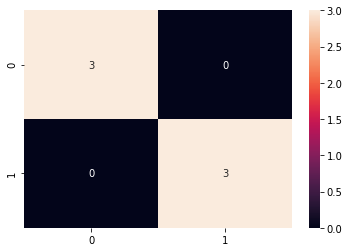

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

In [33]:
RF_model.predict([feature_test[1]])

array([0], dtype=int64)

Text(0.5, 0, 'predicted Cat')

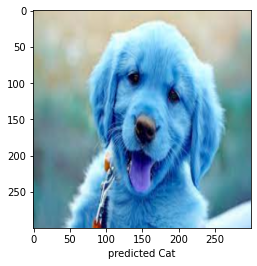

In [47]:
n=np.random.randint(0, test_dataset.shape[0])
plt.imshow(test_dataset[n])
out=RF_model.predict([feature_test[1]])
output=le.inverse_transform(out)
plt.xlabel("predicted"+" "+output[0])